Neural Network Classification with TensoFlow

In [1]:
# Creating data to view and fit 

from sklearn.datasets import make_circles

# make 1000 examples
n_sample=1000

# Create circles

x,y=make_circles(n_sample,noise=0.03,
                random_state=42)


In [2]:
 # cehck out features

 x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
 import pandas as pd
 circles=pd.DataFrame({'x0':x[:,0],'x1':x[:,1],"label":y})
 circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [5]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

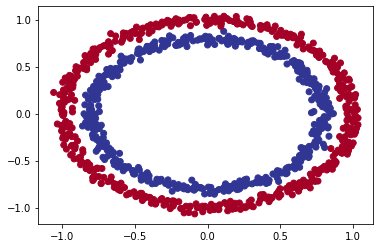

In [6]:
# Visualize with a Plot

import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
# shape of our feature and labels

x.shape,y.shape

((1000, 2), (1000,))

In [8]:
 len(x),len(y)

(1000, 1000)

In [9]:
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
x[15],y[15]

(array([ 0.19022571, -0.76341003]), 1)

In [11]:
import tensorflow as tf

Steps in Modelling

In [12]:
tf.random.set_seed(42)

# 1.
model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2.
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3.

model_1.fit(x,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [13]:
# Improve our Model

model_1.fit(x,y,epochs=200,verbose=0)
model_1.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1.create a Model

model_2=tf.keras.Sequential([tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1)])

# 2,complie the model

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# Fit the Model

model_2.fit(x,y,epochs=100,verbose=0)



In [15]:
# Evaluate the model

model_2.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [16]:
# More improve our model

# Random seed'

tf.random.set_seed(42)

# 1.create the mdoel

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Complie the model

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model

model_3.fit(x,y,epochs=100,verbose=0)

In [17]:
model_3.fit(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - accuracy: 0.5000


In [18]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min,x_max=x[:,0].min() - .1,x[:,0].max() +.1
  y_min,y_max=x[:,1].min() - .1,x[:,1].max() +.1
  xx, yy -np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  
  

In [19]:
x_min,x_max=x[:,0].min() - .1,x[:,0].max() +.1
y_min,y_max=x[:,1].min() - .1,x[:,1].max() +.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [20]:


import numpy as np

def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


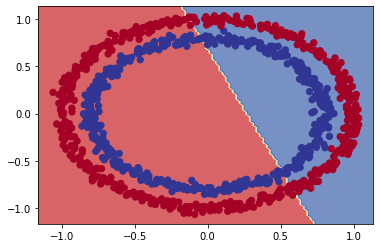

In [21]:
plot_decision_boundary(model_3, x, y)


In [34]:
# Random seed'

tf.random.set_seed(42)

# 1.create the mdoel

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Complie the model

model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model

model_3.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5278 - mae: 0.5278
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5035 - mae: 0.5035
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5022 - mae: 0.5022
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5042 - mae: 0.5042
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5021 - mae: 0.5021
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5034 - mae: 0.5034
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5016 - mae: 0.5016
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5051 - mae: 0.5051
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5018 - mae: 0.5018
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5029 - mae: 0.5029
Epoch 11/100
32/32 [==============================] - 0s 2m

In [35]:
# our model is predicting straight line  so it is used for a regression problem

tf.random.set_seed(42)

x_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)

x_regression,y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [38]:
x_reg_train=x_regression[:150]
x_reg_test=x_regression[150:]
y_reg_train=y_regression[:150]
y_reg_test=y_regression[150:]


#model_3.fit(x_reg_train,y_reg_train,epochs=100)

In [41]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential(
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
)

model_4.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=.001),
            metrics=['accuracy'])

history=model_4.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

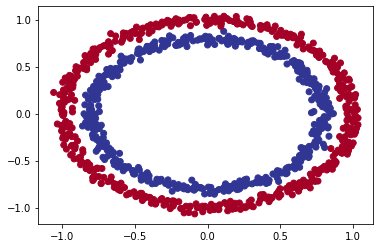

In [43]:
 # visulaizee

 plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

doing binary classifcation...


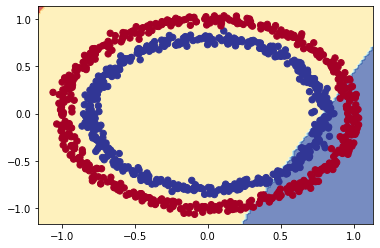

In [45]:
plot_decision_boundary(model =model_4,
                            x=x,y=y)

In [47]:
# With non-linear activation

tf.random.set_seed(42)

model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history=model_5.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [55]:
# Multi-layer neural Network 

tf.random.set_seed(42)

model_6=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1)]
)

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=.01),
                metrics=['accuracy'])

history=model_6.fit(x,y,epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [56]:
# Evalaute the model

model_6.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


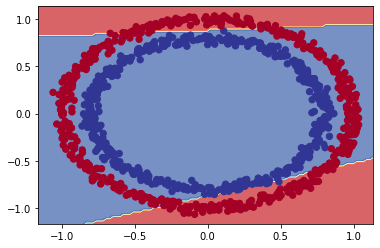

In [57]:
plot_decision_boundary(model_6,x,y)

In [58]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')]
)

model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=.01),
                metrics=['accuracy'])

history=model_7.fit(x,y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

In [59]:
model_7.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9900


[0.02788819745182991, 0.9900000095367432]

doing binary classifcation...


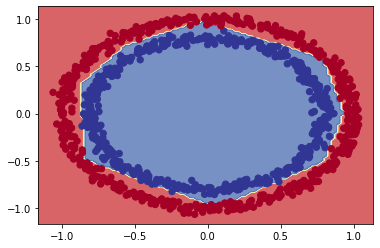

In [60]:
# visualize

plot_decision_boundary(model_7,x,y)